In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()

from matplotlib.pyplot import rc_context

Memory usage: current 0.18 GB, difference +0.18 GB
scanpy==1.10.2 anndata==0.10.8 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.0.3 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [3]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [4]:
#load data with leiden
#home_dir = os.path.expanduser("~")
current_directory = os.getcwd()
adata = sc.read_h5ad(current_directory+"/backups/facs1_norm_filtered_NOlog1p_hvg_z_pca_harmony_after_filtering_and_doublet_filtered_all_samples_50neighbors_0.15dist_25260x37733_250211_16h12.h5ad")

In [5]:
#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/facs1_clustering_leiden_2.5_sub_all_samples_obs_25260x23_250217_20h27.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs = pd.DataFrame(**f)

In [6]:
# loading obs onto adata
adata.obs["leiden_2.5"] = obs["leiden_2.5"]
adata.obs["leiden_2.5_sub"] = obs["leiden_2.5_sub"]

In [24]:
for i, x in enumerate(adata.obs["leiden_2.5"].unique()): 
    print(f'"{x}":"N/A ({x})",')

"0":"N/A (0)",
"1":"N/A (1)",
"2":"N/A (2)",
"7":"N/A (7)",
"10":"N/A (10)",
"11":"N/A (11)",
"12":"N/A (12)",
"4":"N/A (4)",
"14":"N/A (14)",
"17":"N/A (17)",
"18":"N/A (18)",
"19":"N/A (19)",
"15":"N/A (15)",
"21":"N/A (21)",
"13":"N/A (13)",
"16":"N/A (16)",
"3":"N/A (3)",
"23":"N/A (23)",
"24":"N/A (24)",
"25":"N/A (25)",
"8":"N/A (8)",
"26":"N/A (26)",
"6":"N/A (6)",
"27":"N/A (27)",
"22":"N/A (22)",
"20":"N/A (20)",
"28":"N/A (28)",
"5":"N/A (5)",
"9":"N/A (9)",
"29":"N/A (29)",
"30":"N/A (30)",


In [66]:
cell_type_dict = {

"0":"Immature Neutrophils", #Immature Neutrophils
"10":"Mature Neutrophils", #Mature Neutrophils

"27,0":"Basophils", # not the best boundary but okay
"27,1":"AML cells", 
"27,2":"AML cells", 
    
"19":"NK cells",

"23":"T cells",
"24":"T cells",

"1":"Cycling AML cells",
"17":"Cycling AML cells",
"25":"Cycling AML cells",
    
"2":"Monocytes/Myelomonocytes", 
"3":"Monocytes/Myelomonocytes", 
"4":"Monocytes/Myelomonocytes",
"5":"Monocytes/Myelomonocytes", 
"6":"Monocytes/Myelomonocytes", 
"13":"Monocytes/Myelomonocytes", 
"16":"Monocytes/Myelomonocytes", 
"26":"Monocytes/Myelomonocytes", 
"22":"Monocytes/Myelomonocytes", 

"21":"Monocytes/Myelomonocytes", 
"28":"Monocytes/Myelomonocytes", 
"18":"Monocytes/Myelomonocytes", 
    
"7":"AML cells",
"8":"AML cells",
"9":"AML cells",
"11":"AML cells",
"12":"AML cells",
"14":"AML cells",
"15":"AML cells",
"20":"AML cells",
"30":"AML cells",

"29":"B cells",
    
}



cell_type_color_palette_simplified = {
    "Monocytes/Myelomonocytes": "#2041c7", 
    "T cells": "#1b544c", 
    "B cells": "#f2836f",
    "NK cells": "#3bad48", 
    "Mature Neutrophils": "#532b6b", 
    "Basophils": "#2d4173",
    "Immature Neutrophils": "#9846a8",
    "Dendritic cells": "#602ab0",
    "AML cells": "#73472a",
    "Cycling AML cells": "#bf4a2e",


}


In [67]:
adata.obs["cell_type"] = adata.obs["leiden_2.5_sub"].map(cell_type_dict).astype("category")

/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


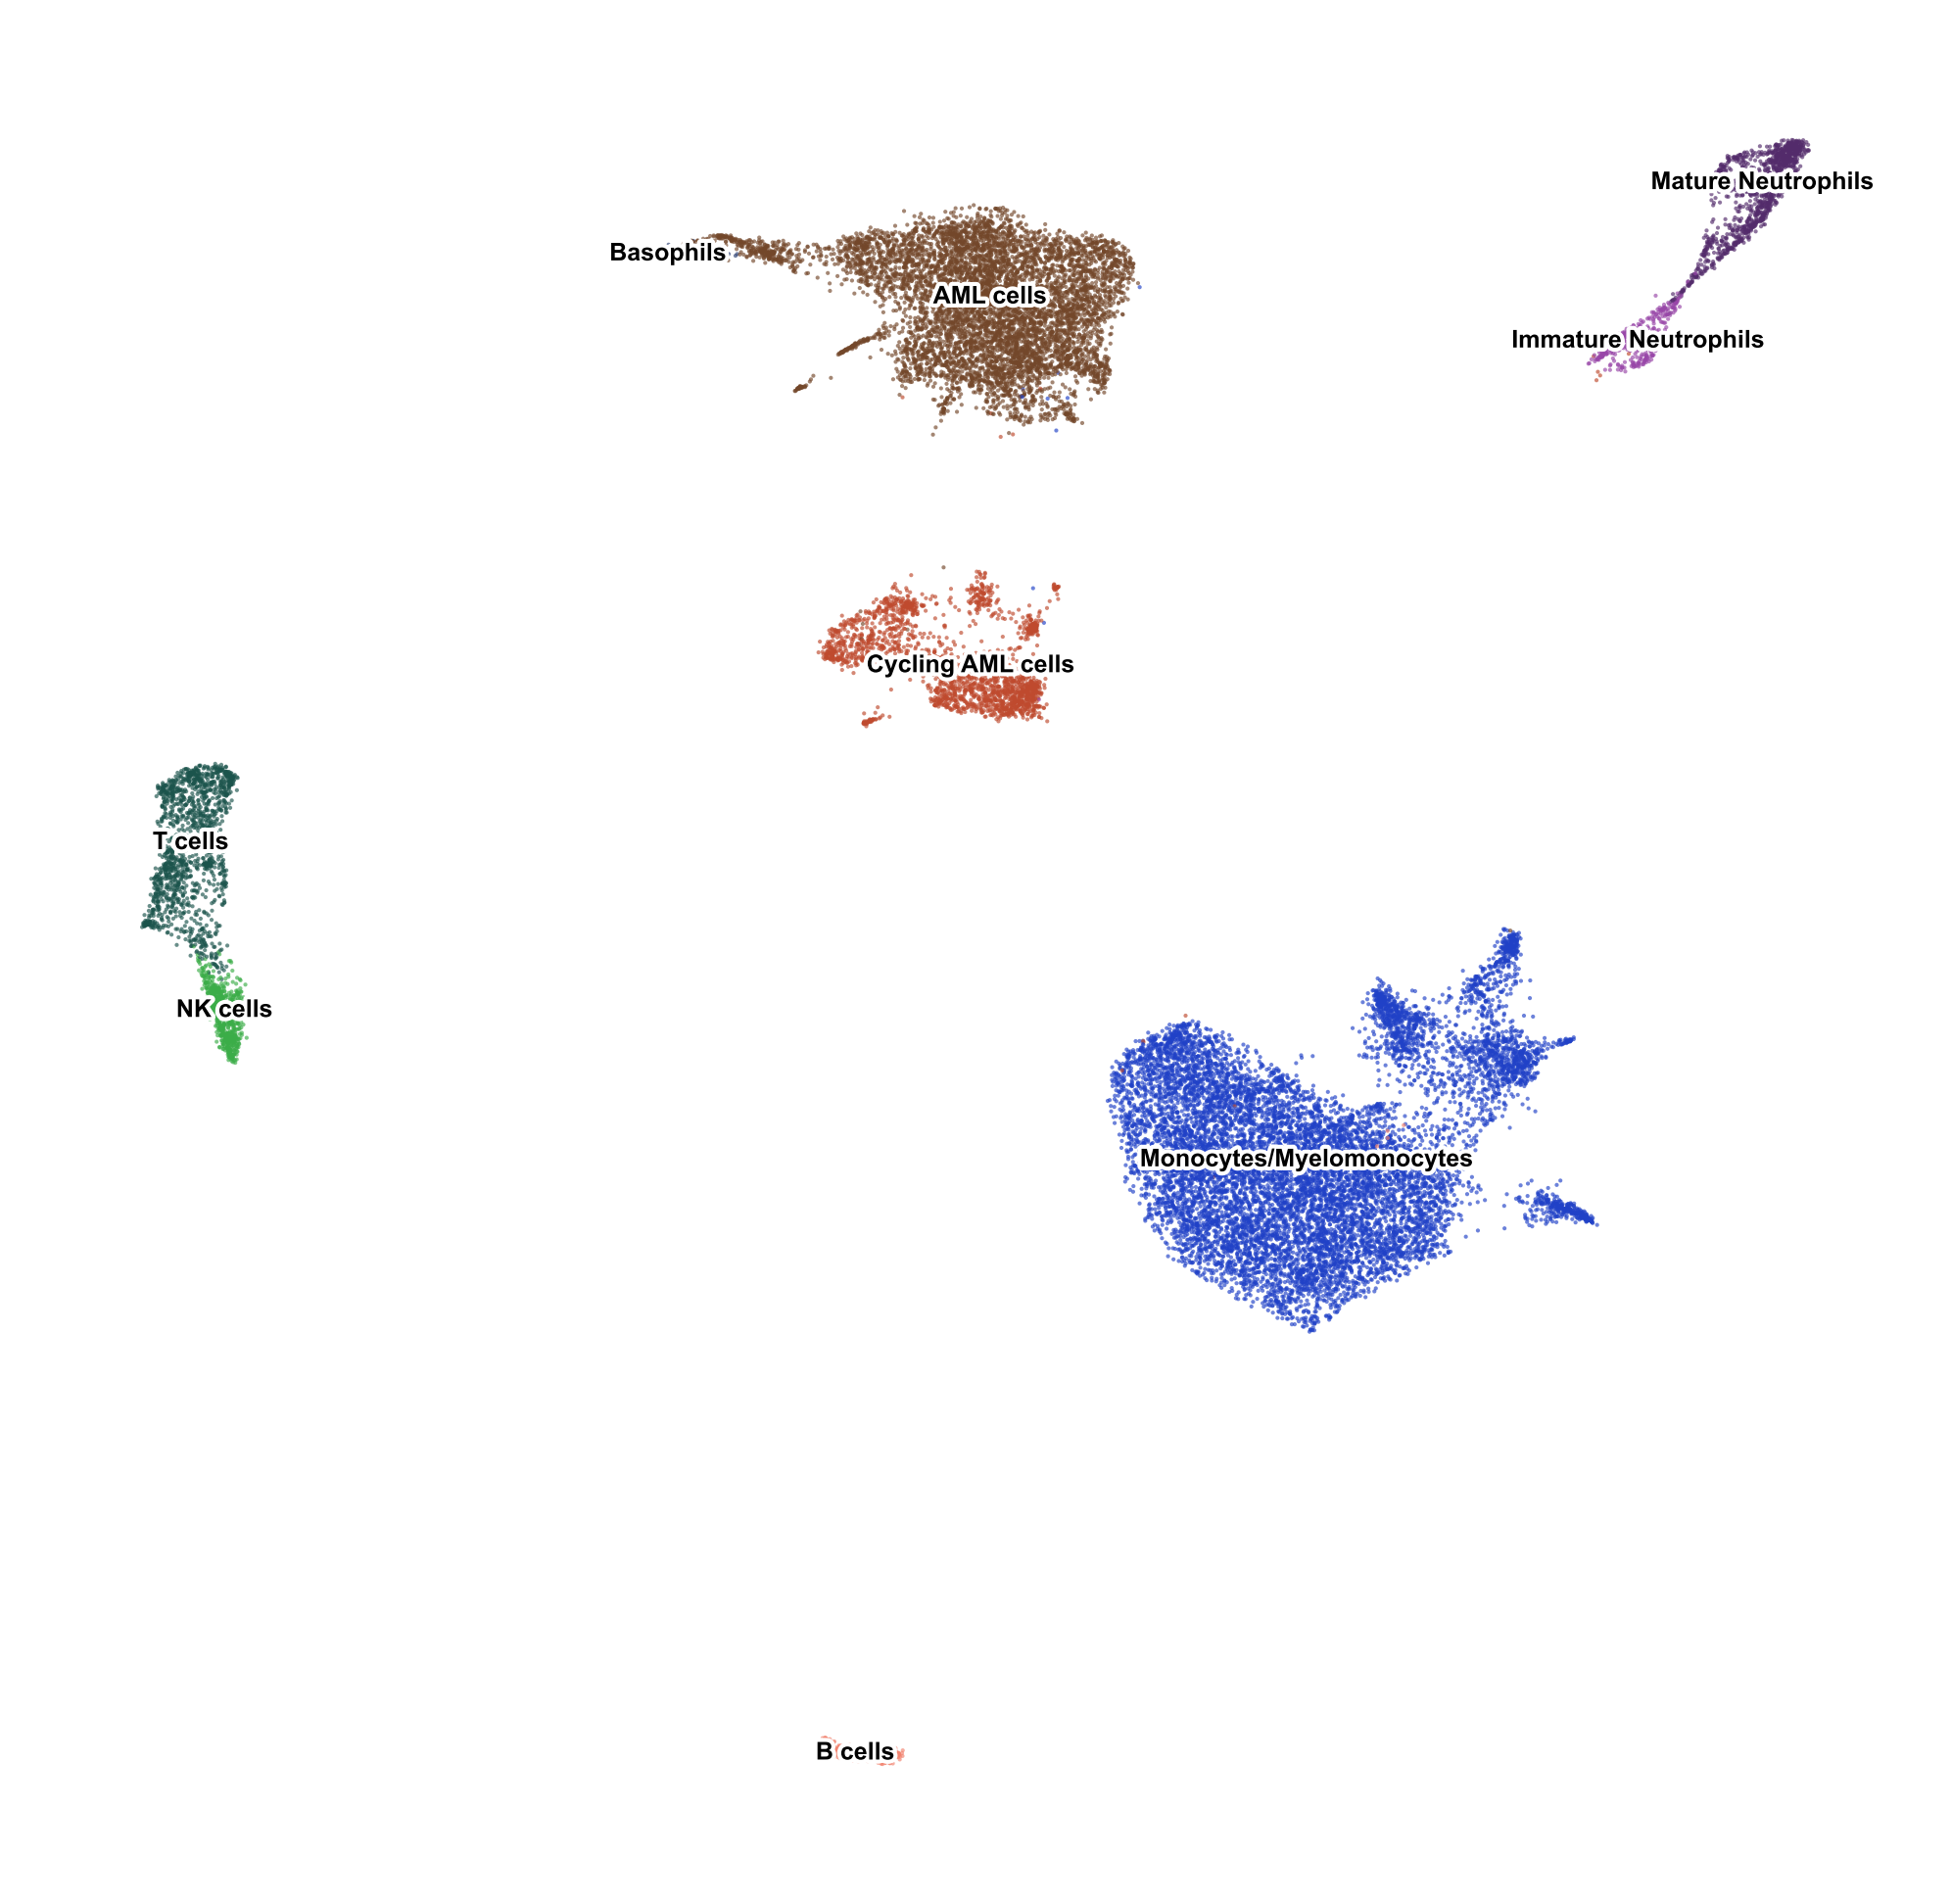

In [68]:
# To randomize cells
np.random.seed(69)
random_indices = np.random.permutation(list(range(adata.shape[0])))


sc.pl.umap(adata[random_indices, :], color = "cell_type", 
           alpha = 0.66, 
           wspace = 0.5,
           ncols = 3,
           s = 1, 
           frameon = False, title = "",
           legend_loc = "on data", legend_fontsize = 3, legend_fontoutline = True, 
           palette = cell_type_color_palette_simplified, #{"Plasma cells": "red"}, 
           save = "_cell_type_only_all_samples_v2.png")

In [69]:
# saving annotated adata

current_directory = os.getcwd()
fname1 = current_directory+"/backups/facs1_leiden_2.5_sub_annotation_%dx%d_%s.h5ad"%(adata.shape[0],adata.shape[1],now())
print(fname1)
adata.write(fname1)

/Users/denis/microtechnologies/sequencing/241030_FACS1/backups/facs1_leiden_2.5_sub_annotation_25260x37733_250217_21h46.h5ad


In [70]:
start = time.time()
# write the pandas dataframe under adata.obs as a separate file
meta = adata.obs
#fname2 = 'backups/obs_info_raw_%dx%d_%s'%(meta.shape[0],meta.shape[1],now())
fname2 = current_directory+"/backups/facs1_leiden_2.5_sub_annotation_obs_%dx%d_%s"%(meta.shape[0],meta.shape[1],now())
print(fname2)
save_df(meta,fname2)
print(time.time()-start)

/Users/denis/microtechnologies/sequencing/241030_FACS1/backups/facs1_leiden_2.5_sub_annotation_obs_25260x24_250217_21h46
0.31827592849731445
